# Place Cell Analyses

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pynwb import NWBHDF5IO

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Define bins to use
bins = [12, 12]

## Load Data

In [5]:
# Load NWB file
io = NWBHDF5IO('nwb_local_data.nwb', 'r')
nwbfile = io.read()

In [6]:
# Extract the position data
pos = nwbfile.acquisition['position']['xy_position']
ptimes = pos.timestamps[:]
positions = pos.data[:]

In [9]:
#
spikes = nwbfile.units.get_unit_spike_times(1)
spikes = spikes / 1000

In [10]:
spike_xs, spike_ys = do_thing(spikes, ptimes, positions)

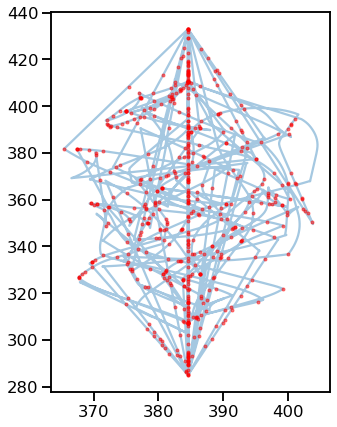

In [11]:
# Plot the map across all position traces
_, ax = plt.subplots(figsize=(5, 7))
ax.plot(*pos.data, alpha=0.4)
ax.plot(spike_xs, spike_ys, '.', color='red', alpha=0.5, ms=6)

<ipython-input-12-d1a722576b5e>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=(5, 7))


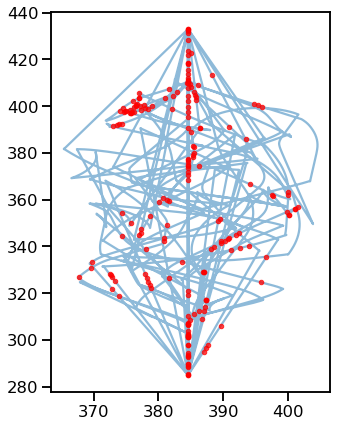

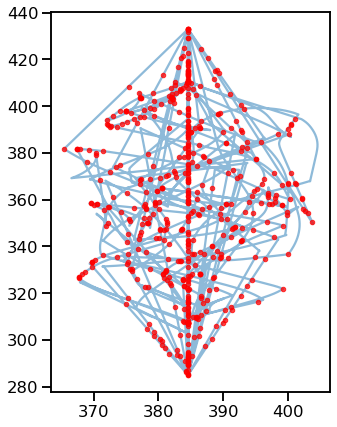

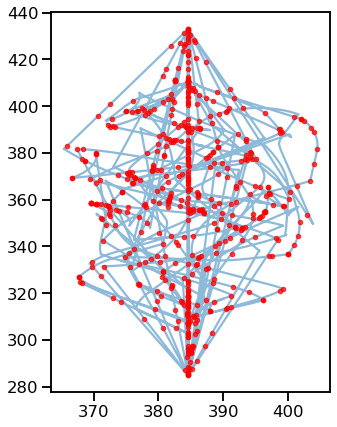

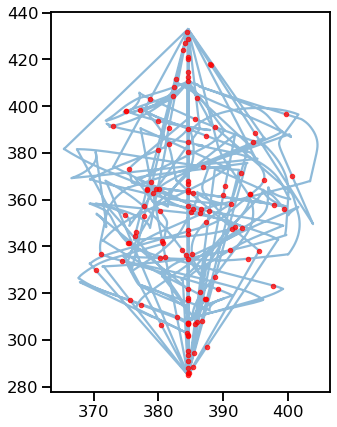

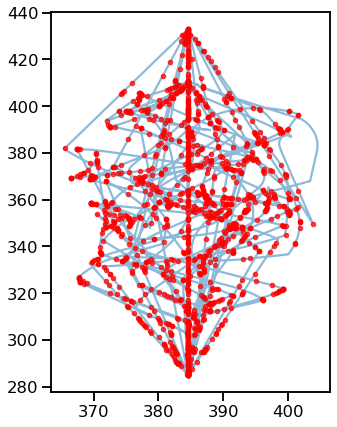

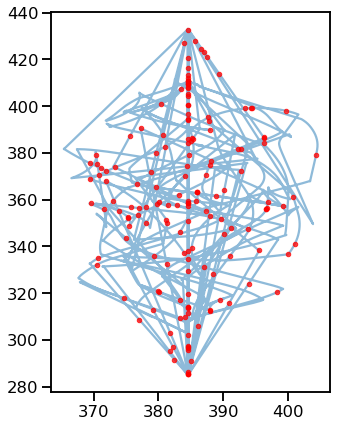

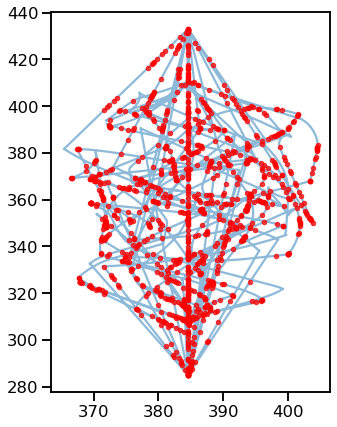

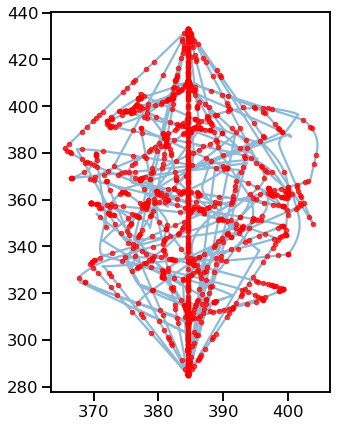

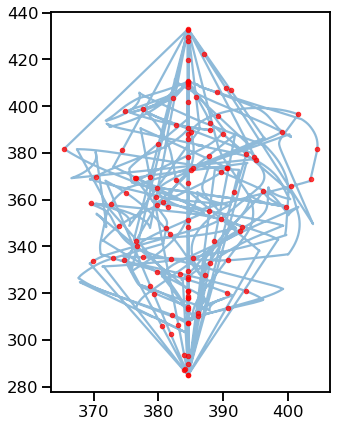

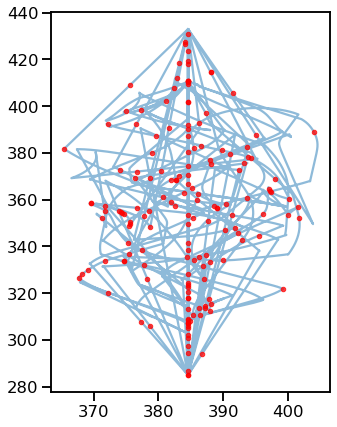

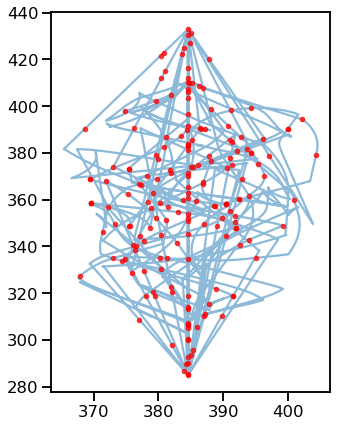

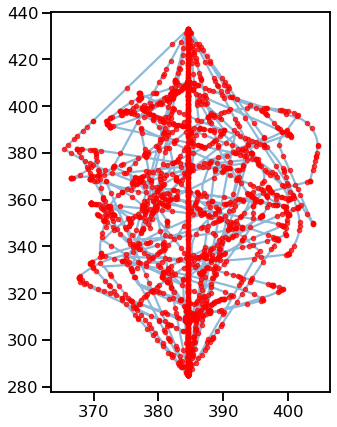

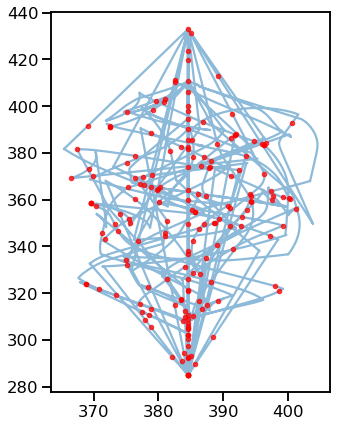

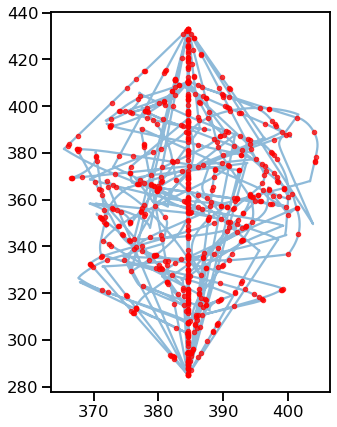

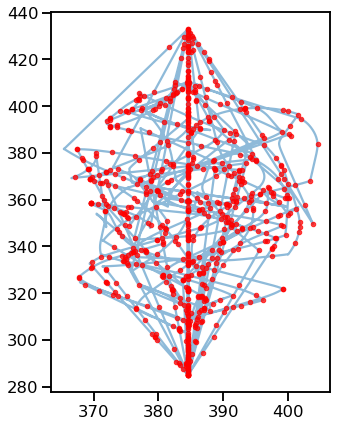

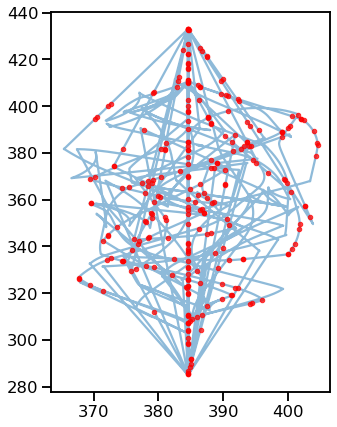

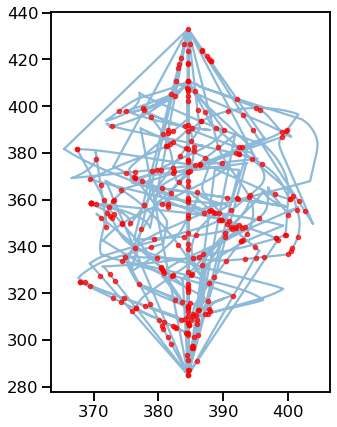

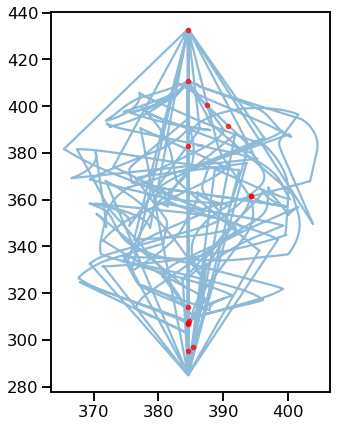

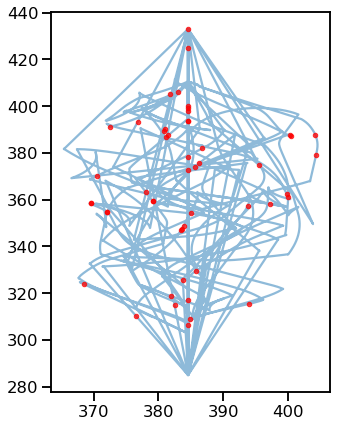

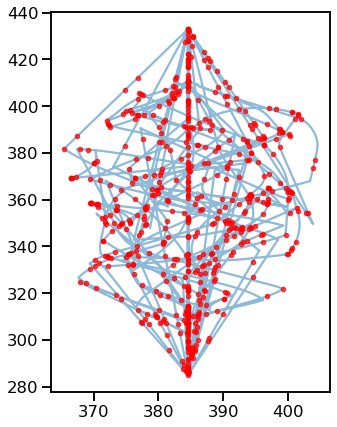

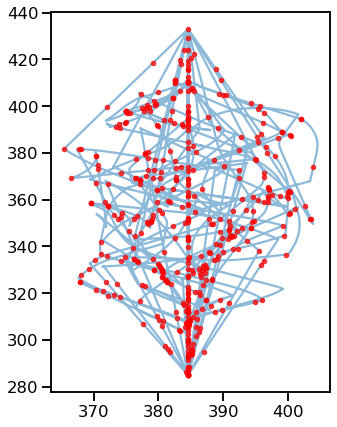

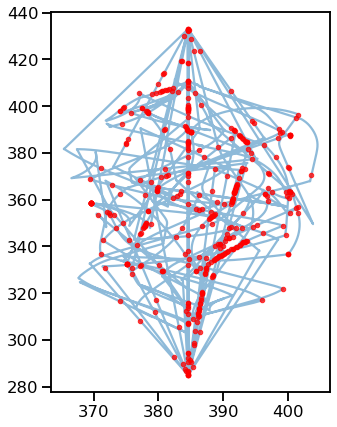

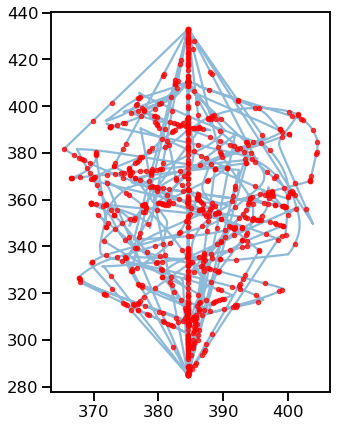

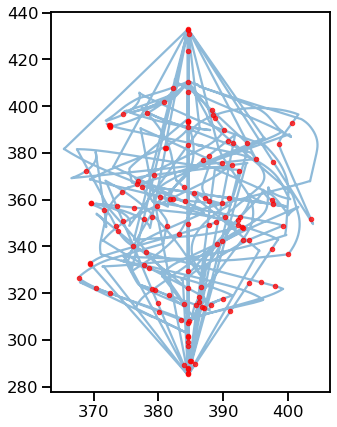

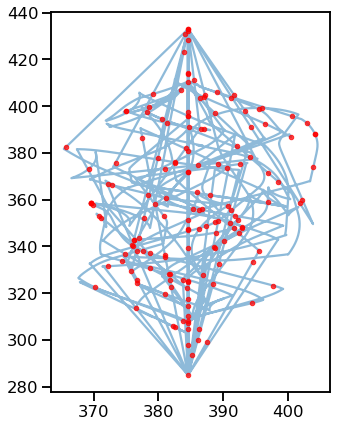

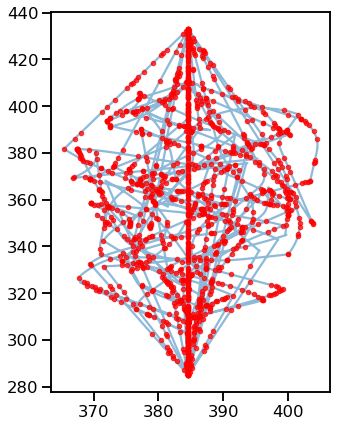

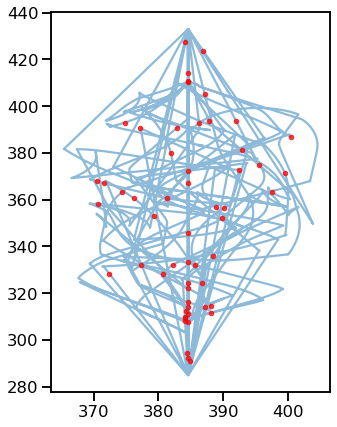

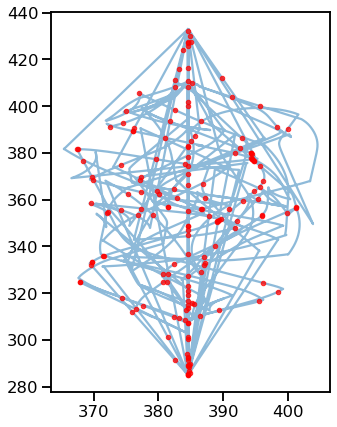

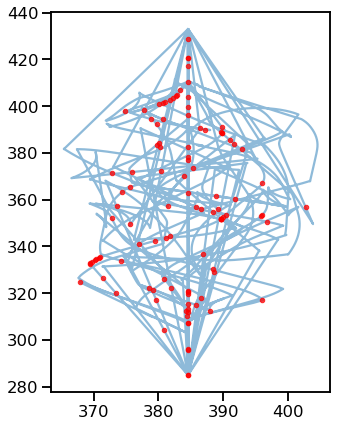

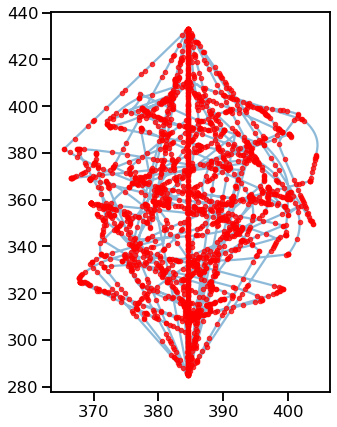

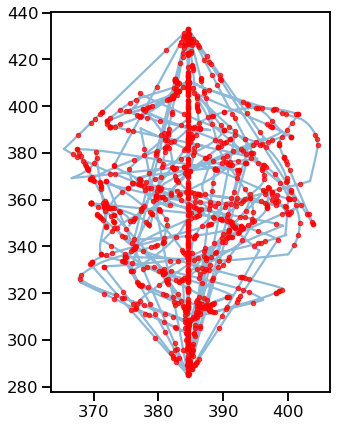

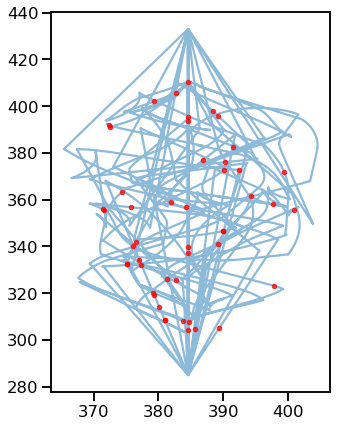

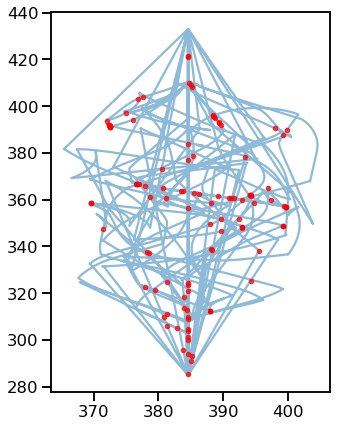

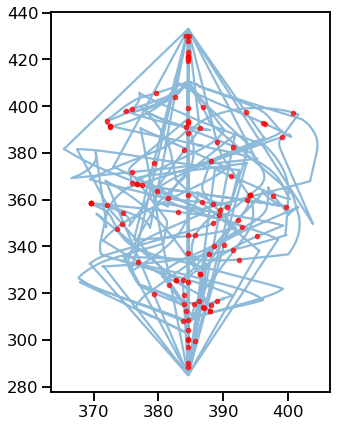

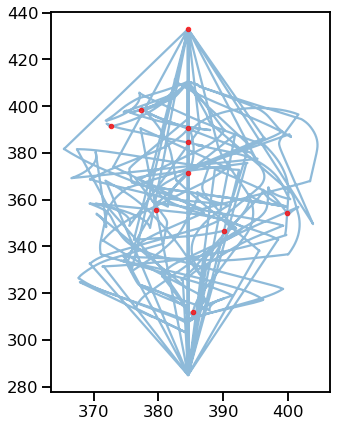

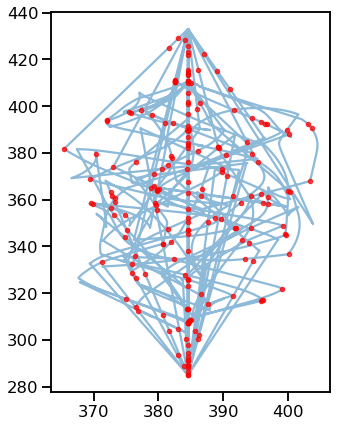

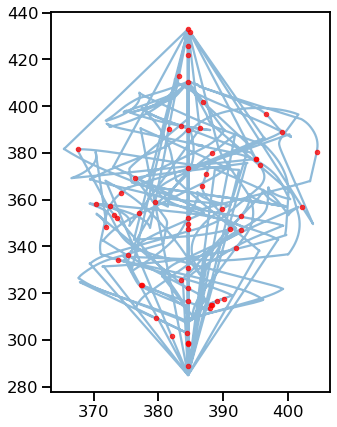

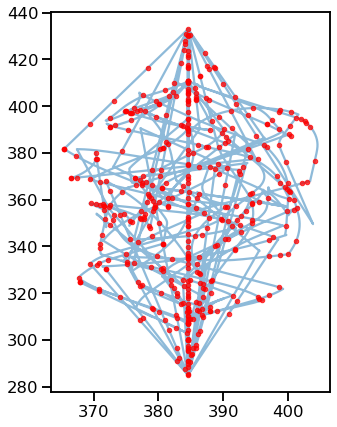

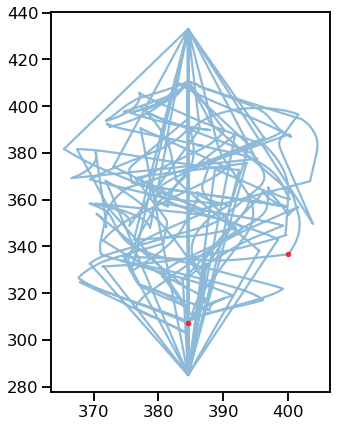

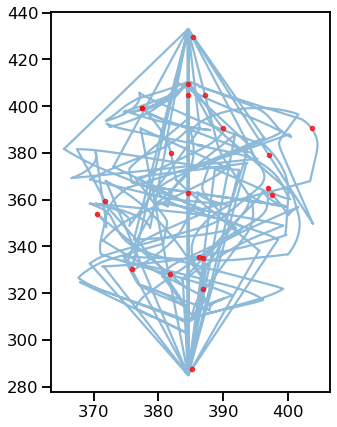

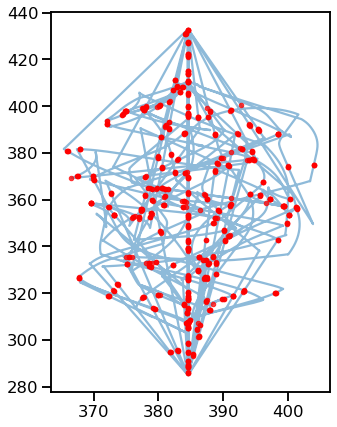

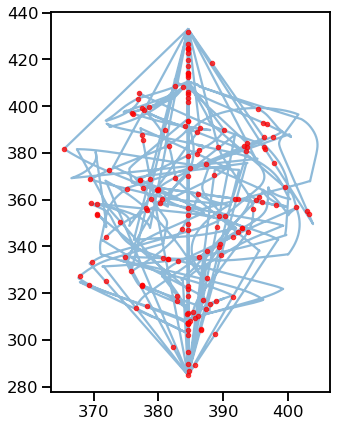

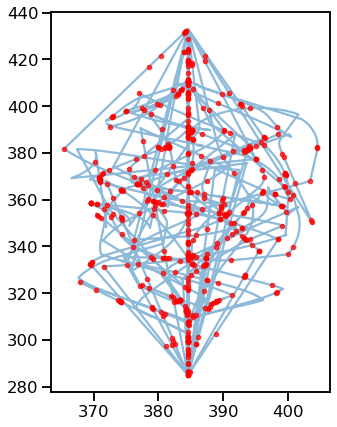

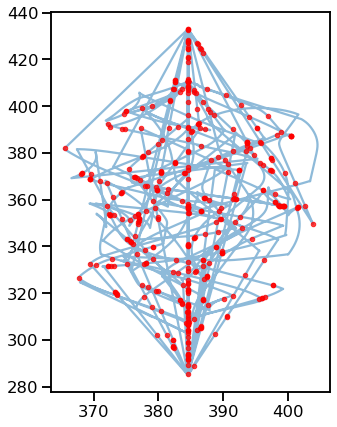

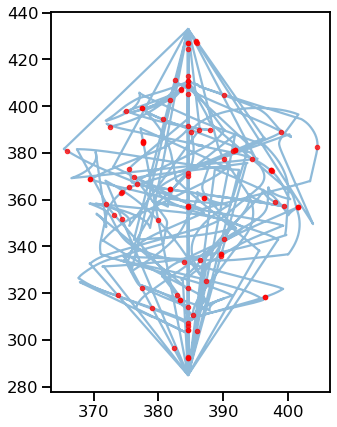

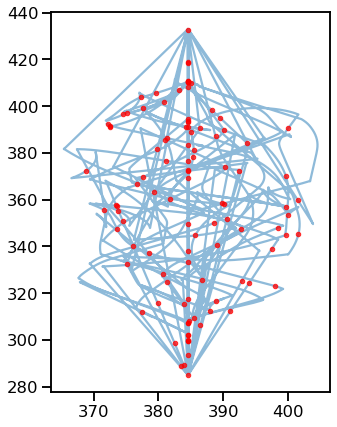

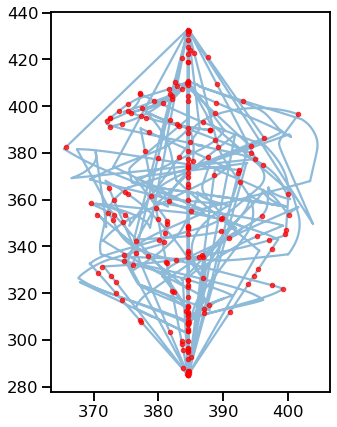

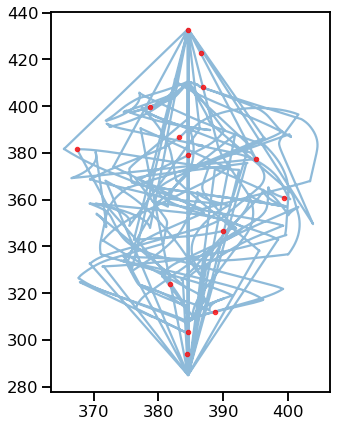

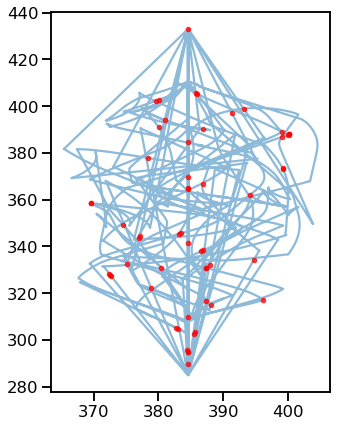

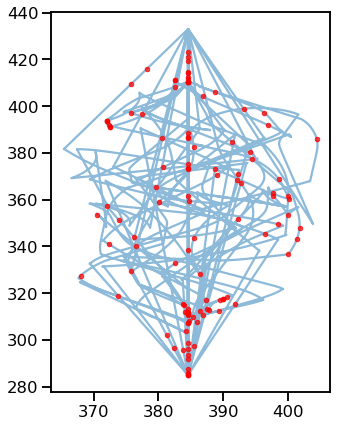

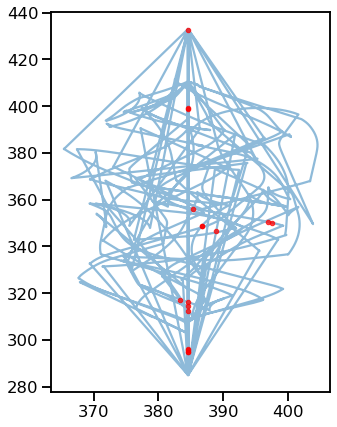

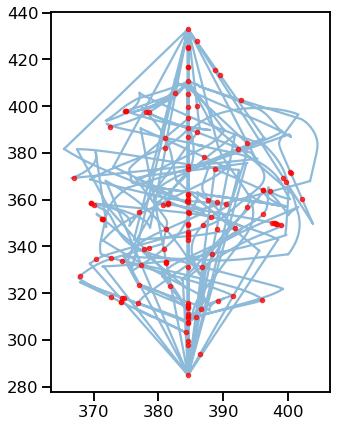

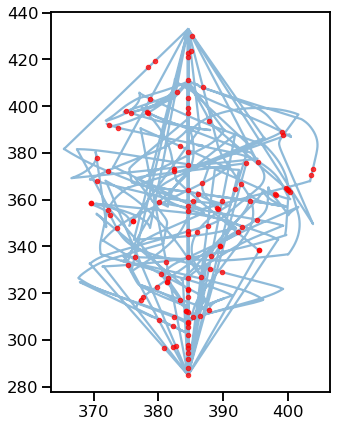

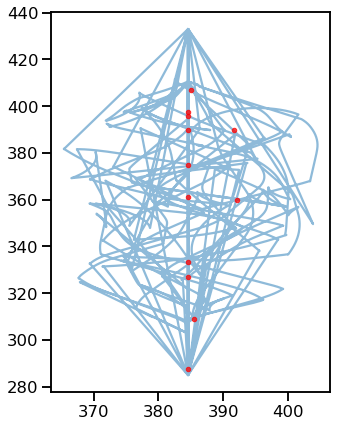

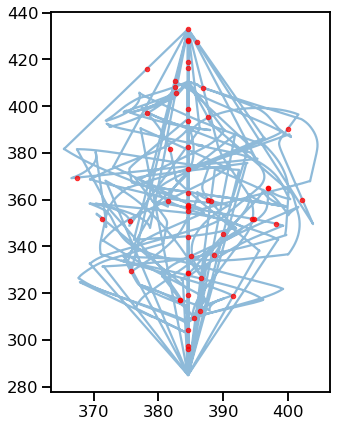

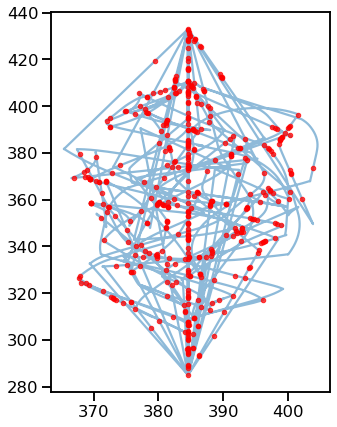

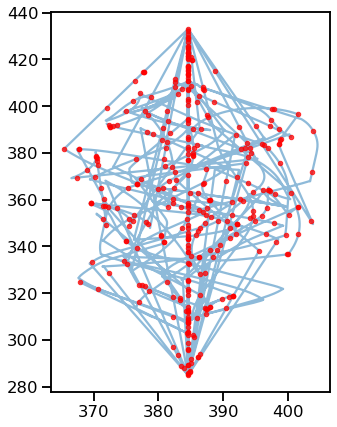

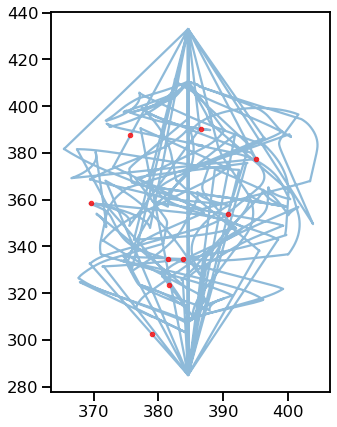

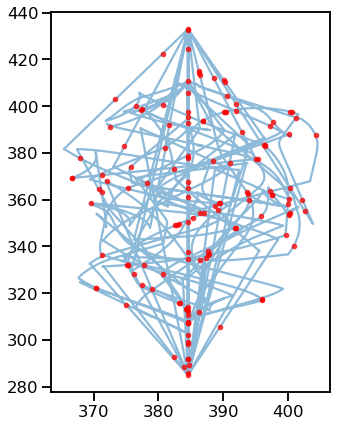

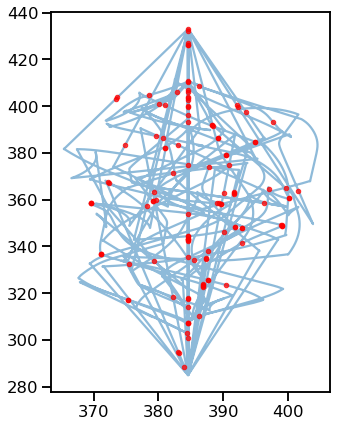

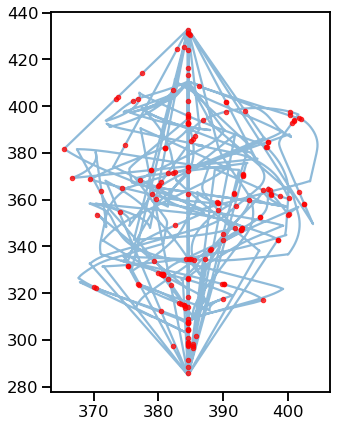

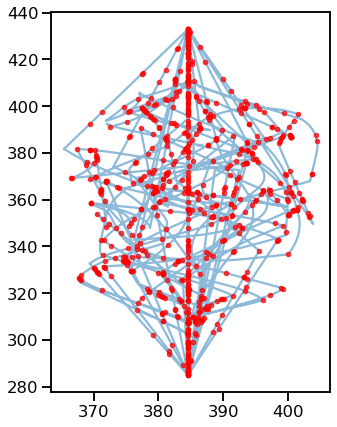

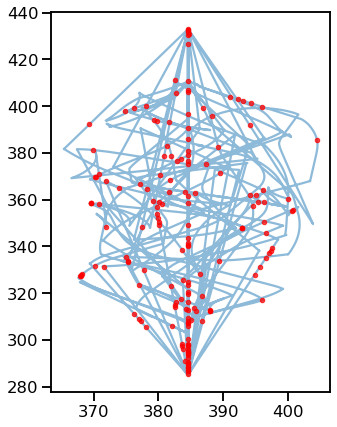

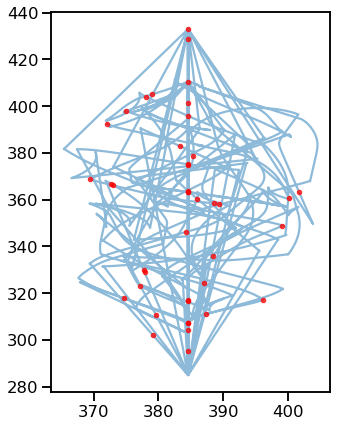

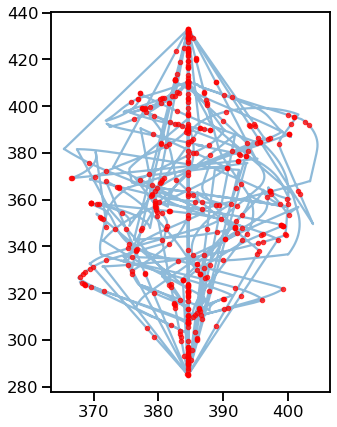

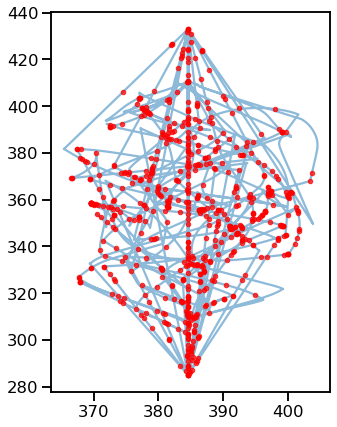

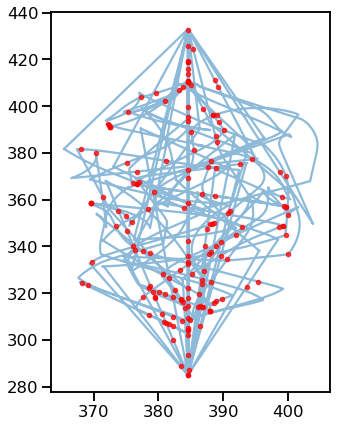

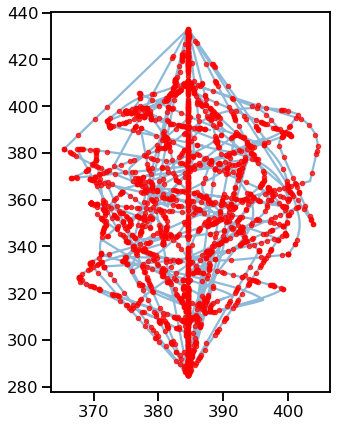

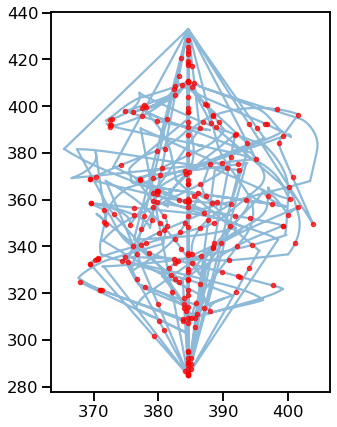

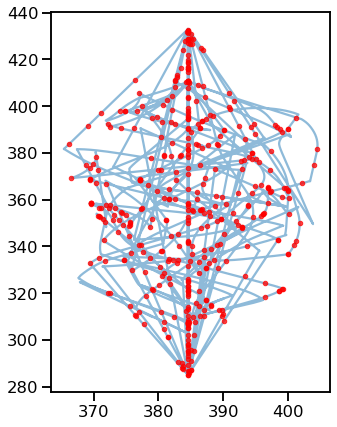

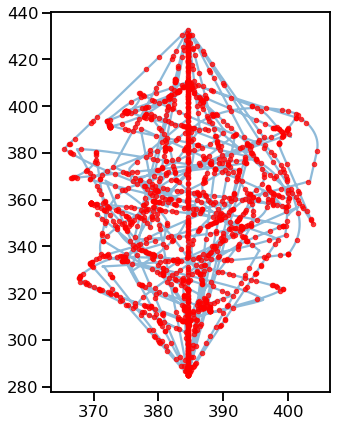

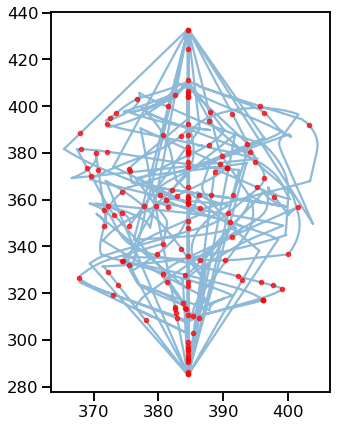

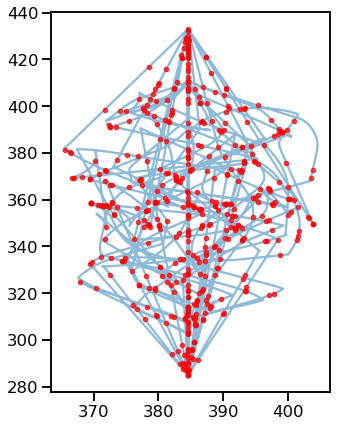

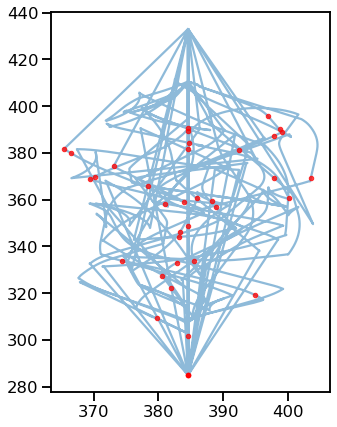

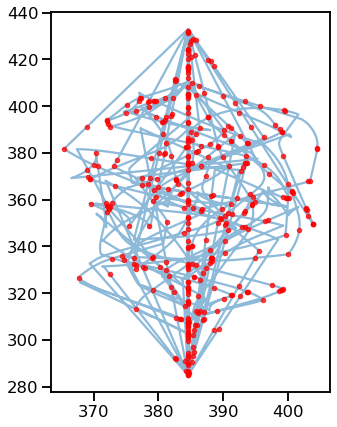

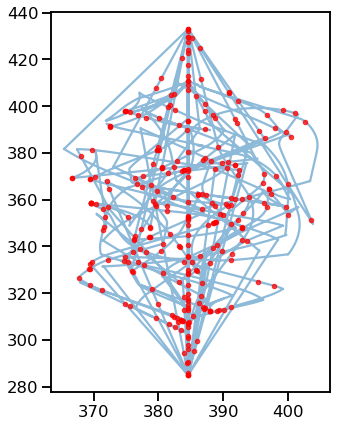

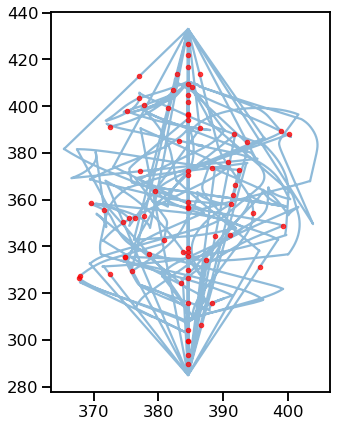

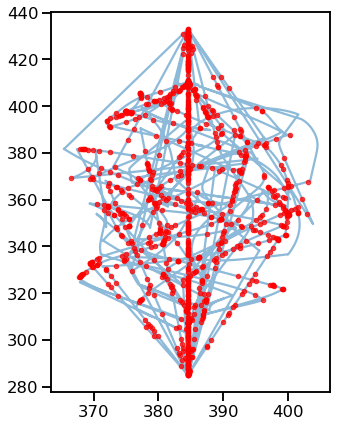

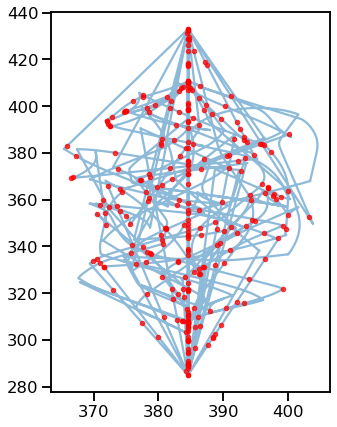

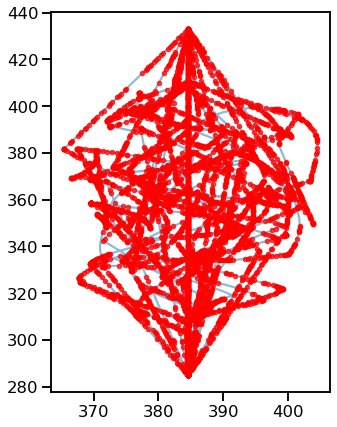

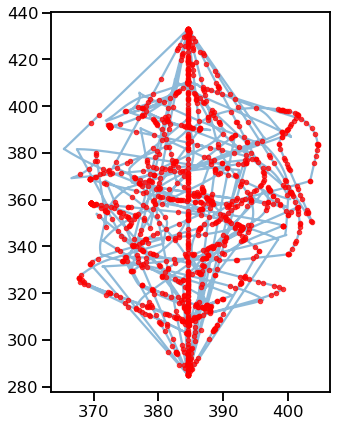

In [12]:
for uind in range(len(nwbfile.units)):
    
    spikes = nwbfile.units.get_unit_spike_times(uind) / 1000
    
    spike_xs, spike_ys = do_thing(spikes, ptimes, positions)
    
    # Plot the map across all position traces
    _, ax = plt.subplots(figsize=(5, 7))
    ax.plot(*pos.data, alpha=0.5)
    ax.plot(spike_xs, spike_ys, '.', color='red', alpha=0.75)

In [8]:
def do_thing(spikes, ptimes, positions):
    """   """
    
    tspike, tpos = [], []
    spike_xs = []
    spike_ys = []
    inds = []
    
    for spike in spikes:

        idx = (np.abs(ptimes - spike)).argmin()
        diff = np.abs(ptimes[idx] - spike)

        if diff < 100:

            inds.append(idx)

            spike_xs.append(positions[0, idx])
            spike_ys.append(positions[1, idx])

            tspike.append(spike)
            tpos.append(ptimes[idx])
            
    return spike_xs, spike_ys